In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import scipy
from heapq import heappop, heappush

# Task 1 - OGM Convolution

# Task 1a

In [2]:
def load_pbm_image(file_path):
    image = imageio.imread(file_path, format='pbm')
    return image

In [3]:
def visualize_image(image, cmap=None):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [4]:
def convolve_image(ogm, kernel):
    convolved_channels = [scipy.signal.convolve2d(ogm[:, :, i], kernel, mode='same', boundary='fill', fillvalue=0) for i in range(3)]
    # Stack the result to obtain the convolved RGB image
    ogm_convolved = np.stack(convolved_channels, axis=-1)
    #ogm_convolved = np.clip(ogm_convolved, 0, 1)
    ogm_convolved = (ogm_convolved - np.min(ogm_convolved)) / (np.max(ogm_convolved) - np.min(ogm_convolved))

    return ogm_convolved

# Task 1b

In [5]:
file_path = 'Assignment_10_Map.pbm'
ogm = load_pbm_image(file_path)

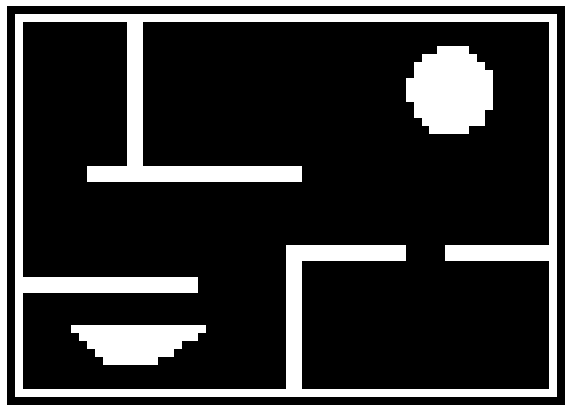

In [6]:
visualize_image(ogm)

In [7]:
ogm.shape

(50, 70, 3)

In [8]:
kernel_1 = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

kernel_1 = np.divide(kernel_1, 16)

In [9]:
l = 1.2
a = np.exp(-l)
b = np.exp(-l * np.sqrt(2))
c = np.exp(0.0)

kernel_2 = np.array([
    [b,a,b],
    [a,c,a],
    [b,a,b]
])

In [10]:
kernel_3 = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

In [11]:
ogm_convolved_1 = convolve_image(ogm, kernel_1)

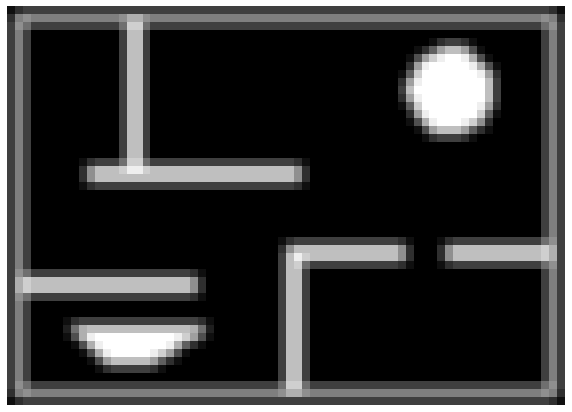

In [12]:
visualize_image(ogm_convolved_1)

In [13]:
ogm_convolved_1.shape

(50, 70, 3)

In [14]:
ogm_convolved_2 = convolve_image(ogm, kernel_2)

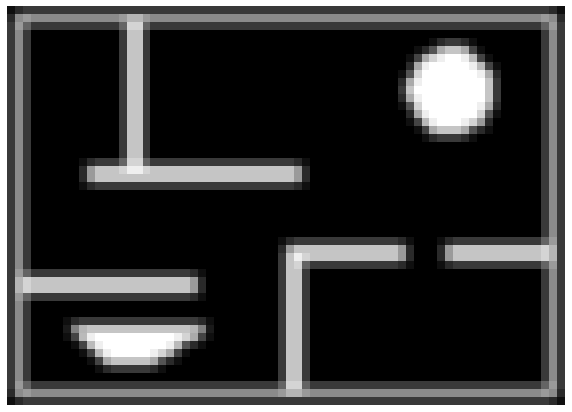

In [15]:
visualize_image(ogm_convolved_2)

In [16]:
ogm_convolved_2.shape

(50, 70, 3)

In [17]:
ogm_convolved_3 = convolve_image(ogm, kernel_3)

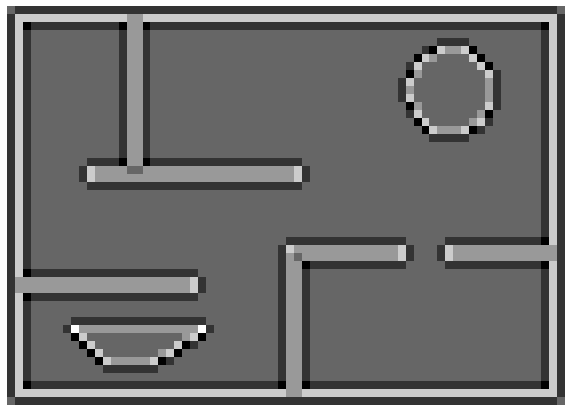

In [18]:
visualize_image(ogm_convolved_3)

In [19]:
ogm_convolved_3.shape

(50, 70, 3)

# Task 2 - A*

In [20]:
world = np.array([
    [1,1,1,1,0,1,1,1,1,1],
    [1,1,0,1,0,1,1,0,0,1],
    [1,0,0,1,1,1,0,1,0,1],
    [1,1,1,0,1,1,1,1,0,1],
    [1,0,0,1,1,1,1,0,0,1],
    [1,0,1,1,0,0,1,0,1,1],
    [1,0,1,0,1,0,1,0,0,1],
    [1,0,1,0,1,0,0,1,1,1],
    [1,0,0,0,0,0,1,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
])

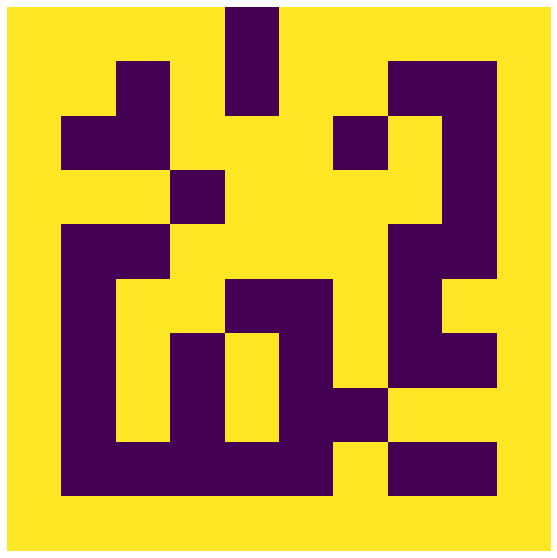

In [21]:
visualize_image(world)

# Task 2a: 4-neighbours A* (without heuristic)

In [22]:
def a_star_4_neighbours_no_heuristics(world, start, goal):
    '''
    world - 2D grid map
    start - 2D coordinates of start point in world
    goal - 2D coordinates of goal point in world
    '''
    
    rows, cols = world.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # N, E, S, W

    # Priority queue to store cells with their cost and coordinates
    priority_queue = [(0, start)]
    explored = set()

    while priority_queue:
        current_cost, current_cell = heappop(priority_queue)

        if current_cell == goal:
            break

        if current_cell in explored:
            continue

        explored.add(current_cell)

        for direction in directions:
            new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
            if 0 <= new_cell[0] < rows and 0 <= new_cell[1] < cols and world[new_cell] == 1:
                new_cost = current_cost + 1  # Assuming each traversal is 1m distance
                heappush(priority_queue, (new_cost, new_cell))

    return current_cost, len(np.where(world == 1)[0]) - len(explored)

In [23]:
# Define start and goal points
start_point = (9, 4)
goal_point = (7, 2)

In [24]:
# Run A* algorithm without heuristics
path_length, unexplored_cells = a_star_4_neighbours_no_heuristics(world, start_point, goal_point)

print(f"Length of the shortest path from S to G (4 neighbours): {path_length}m")
print(f"Number of free cells not explored (4 neighbours): {unexplored_cells}")

Length of the shortest path from S to G (4 neighbours): 26m
Number of free cells not explored (4 neighbours): 3


# Task 2b: 8-neighbours A* (without heuristic)

In [25]:
def a_star_8_neighbours_no_heuristics(world, start, goal):
    '''
    world - 2D grid map
    start - 2D coordinates of start point in world
    goal - 2D coordinates of goal point in world
    '''
    
    rows, cols = world.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]  # N, E, S, W, NE, NW, SE, SW

    # Priority queue to store cells with their cost and coordinates
    priority_queue = [(0, start)]
    explored = set()

    while priority_queue:
        current_cost, current_cell = heappop(priority_queue)

        if current_cell == goal:
            break

        if current_cell in explored:
            continue

        explored.add(current_cell)

        for direction in directions:
            new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
            if 0 <= new_cell[0] < rows and 0 <= new_cell[1] < cols and world[new_cell] == 1:
                new_cost = current_cost + 1  # Assuming each traversal is 1m distance
                heappush(priority_queue, (new_cost, new_cell))

    return current_cost, len(np.where(world == 1)[0]) - len(explored)

In [26]:
# Define start and goal points
start_point = (9, 4)
goal_point = (7, 2)

In [27]:
# Run A* algorithm without heuristics
path_length, unexplored_cells = a_star_8_neighbours_no_heuristics(world, start_point, goal_point)

print(f"Length of the shortest path from S to G (8 neighbours): {path_length}m")
print(f"Number of free cells not explored (8 neighbours): {unexplored_cells}")

Length of the shortest path from S to G (8 neighbours): 10m
Number of free cells not explored (8 neighbours): 8


# Task 3b: 8-neighbours A* (with heuristic)

In [28]:
def euclidean_distance(cell, goal):
    # Simplified straight-line distance heuristic
    return np.linalg.norm(np.array(cell) - np.array(goal))

In [29]:
def precompute_heuristic_euclidean_distance(world, goal):
    rows, columns = world.shape
    heuristic = np.zeros(world.shape)
    for i in range(rows):
        for j in range(columns):
            if(world[i,j] == 1):
                heuristic[i,j] = euclidean_distance((i,j), goal)

    return heuristic

In [30]:
def precompute_heuristic_simplified_euclidean_distance(world, goal):
    rows, columns = world.shape
    heuristic = np.zeros(world.shape)

    for i in range(rows):
        for j in range(columns):
            dx = np.abs(i - goal[0])
            dy = np.abs(j - goal[1])

            diagonal_cost = np.min(np.array([dx, dy]))
            straight_cost = np.abs(dx - dy)
            
            if(world[i,j] == 1):
                heuristic[i,j] = straight_cost + diagonal_cost

    return heuristic

In [31]:
def a_star_8_neighbours_with_heuristics(world, start, goal, heuristic_values):
    '''
    world - 2D grid map
    start - 2D coordinates of start point in world
    goal - 2D coordinates of goal point in world
    '''
    
    rows, cols = world.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]  # N, E, S, W, NE, NW, SE, SW

    # Priority queue to store cells with their cost and coordinates (f,g,h,cell)
    priority_queue = [(0 + heuristic_values[start], 0, heuristic_values[start], start)]
    explored = set()

    while priority_queue:
        current_f, current_g, current_h, current_cell = heappop(priority_queue)

        if current_cell == goal:
            break

        if current_cell in explored:
            continue

        explored.add(current_cell)

        for direction in directions:
            new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
            if 0 <= new_cell[0] < rows and 0 <= new_cell[1] < cols and world[new_cell] == 1:
                new_g = current_g + 1  # Assuming each traversal is 1m distance
                # Use precomputed heuristic
                new_h = heuristic_values[new_cell]
                new_f = new_g + new_h
                heappush(priority_queue, (new_f, new_g, new_h, new_cell))

    return current_g, len(np.where(world == 1)[0]) - len(explored)

In [32]:
# Define start and goal points
start_point = (9, 4)
goal_point = (7, 2)

### Heuristic: Real Euclidean Distance

In [33]:
# Run A* algorithm with real euclidean distance heuristic
heuristic_values = precompute_heuristic_euclidean_distance(world, goal_point)
path_length, unexplored_cells = a_star_8_neighbours_with_heuristics(world, start_point, goal_point, heuristic_values)

print(f"Length of the shortest path from S to G (8 neighbours with real euclidean distance heuristic): {path_length}m")
print(f"Number of free cells not explored (8 neighbours with euclidean distance heuristic): {unexplored_cells}")

Length of the shortest path from S to G (8 neighbours with real euclidean distance heuristic): 10m
Number of free cells not explored (8 neighbours with euclidean distance heuristic): 43


In [34]:
heuristic_values

array([[7.28010989, 7.07106781, 7.        , 7.07106781, 0.        ,
        7.61577311, 8.06225775, 8.60232527, 9.21954446, 9.89949494],
       [6.32455532, 6.08276253, 0.        , 6.08276253, 0.        ,
        6.70820393, 7.21110255, 0.        , 0.        , 9.21954446],
       [5.38516481, 0.        , 0.        , 5.09901951, 5.38516481,
        5.83095189, 0.        , 7.07106781, 0.        , 8.60232527],
       [4.47213595, 4.12310563, 4.        , 0.        , 4.47213595,
        5.        , 5.65685425, 6.40312424, 0.        , 8.06225775],
       [3.60555128, 0.        , 0.        , 3.16227766, 3.60555128,
        4.24264069, 5.        , 0.        , 0.        , 7.61577311],
       [2.82842712, 0.        , 2.        , 2.23606798, 0.        ,
        0.        , 4.47213595, 0.        , 6.32455532, 7.28010989],
       [2.23606798, 0.        , 1.        , 0.        , 2.23606798,
        0.        , 4.12310563, 0.        , 0.        , 7.07106781],
       [2.        , 0.        , 0.       

### Heuristic: Simplified Euclidean Distance

In [35]:
# Run A* algorithm with simplified euclidean distance heuristic
heuristic_values = precompute_heuristic_simplified_euclidean_distance(world, goal_point)
path_length, unexplored_cells = a_star_8_neighbours_with_heuristics(world, start_point, goal_point, heuristic_values)

print(f"Length of the shortest path from S to G (8 neighbours with simplified euclidean distance heuristic): {path_length}m")
print(f"Number of free cells not explored (8 neighbours with simplified euclidean distance heuristic): {unexplored_cells}")

Length of the shortest path from S to G (8 neighbours with simplified euclidean distance heuristic): 10m
Number of free cells not explored (8 neighbours with simplified euclidean distance heuristic): 42


In [36]:
# Simplified euclidean distance heuristic (0 is for occupied cells)
heuristic_values

array([[7., 7., 7., 7., 0., 7., 7., 7., 7., 7.],
       [6., 6., 0., 6., 0., 6., 6., 0., 0., 7.],
       [5., 0., 0., 5., 5., 5., 0., 5., 0., 7.],
       [4., 4., 4., 0., 4., 4., 4., 5., 0., 7.],
       [3., 0., 0., 3., 3., 3., 4., 0., 0., 7.],
       [2., 0., 2., 2., 0., 0., 4., 0., 6., 7.],
       [2., 0., 1., 0., 2., 0., 4., 0., 0., 7.],
       [2., 0., 0., 0., 2., 0., 0., 5., 6., 7.],
       [2., 0., 0., 0., 0., 0., 4., 0., 0., 7.],
       [2., 2., 2., 2., 2., 3., 4., 5., 6., 7.]])